<a href="https://colab.research.google.com/github/PabloJRW/clustering/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
from numpy.random.mtrand import rand
X, y, c = make_blobs(
    n_samples=500, 
    cluster_std=0.8, 
    centers=4, 
    n_features=2, 
    return_centers=True,
    random_state=23
    )

df_blobs = pd.DataFrame(
    {
        'x1': X[:, 0],
        'x2': X[:, 1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:, 0],
        'x2': c[:, 1]
    }
)

In [3]:
X_m, y_m = make_moons(
    n_samples=250,
    noise=0.05, 
    random_state=24
)

df_moons = pd.DataFrame(
    {
        'x1': X_m[:, 0],
        'x2': X_m[:, 1]
    }
)

## Visualización de los datos

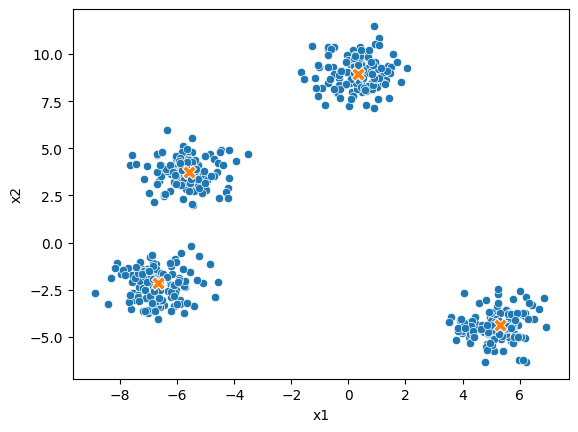

In [4]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.show()

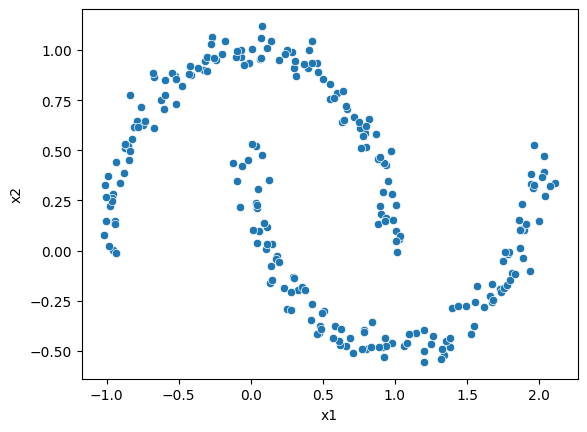

In [5]:
sns.scatterplot(data=df_moons, x='x1', y='x2')
plt.show()

 ## Implementando DBSCAN

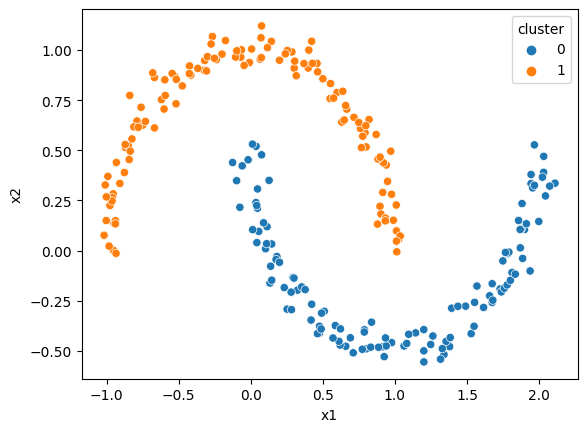

In [6]:
dbscan = DBSCAN(eps=0.3, min_samples=3)
y_m_preds = dbscan.fit_predict(X_m)
df_moons['cluster'] = y_m_preds

sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

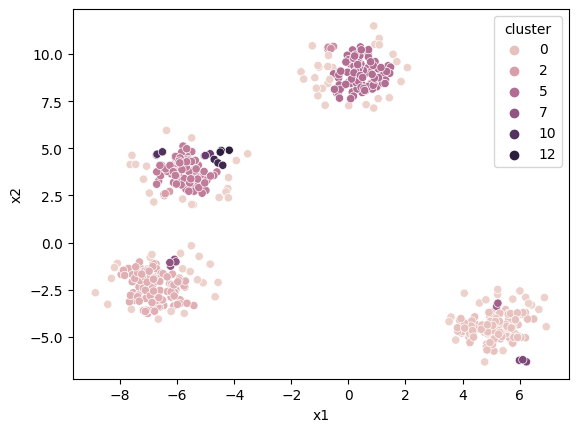

In [7]:
dbscan2 = DBSCAN(eps=0.3, min_samples=3)
y_preds = dbscan2.fit_predict(X)
df_blobs['cluster'] = y_preds

sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.show()

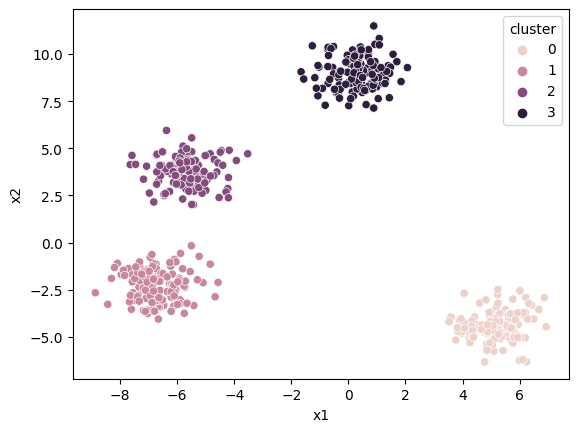

In [8]:
dbscan2 = DBSCAN(eps=1, min_samples=3)
y_preds = dbscan2.fit_predict(X)
df_blobs['cluster'] = y_preds

sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.show()

### Hyperparameters

In [9]:
from sklearn.neighbors import NearestNeighbors

In [10]:
nn = NearestNeighbors(n_neighbors=3)
nn_fitted = nn.fit(X)
distances, indices = nn_fitted.kneighbors(X)

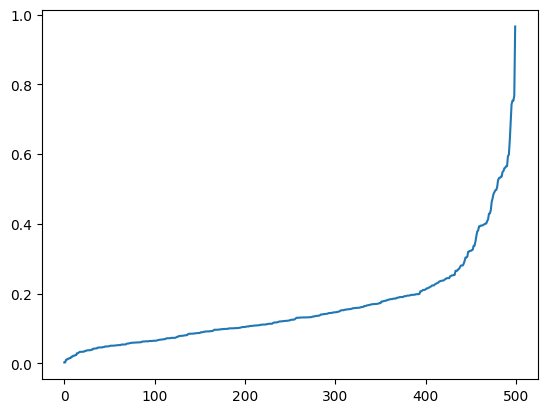

In [11]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

plt.plot(distances)
plt.show()

In [12]:
eps_values = np.arange(0.45, 0.8, 0.05)
min_samples = np.arange(2, 10)

In [13]:
from itertools import product

# Convertir a matriz
dbscan_params = list(product(eps_values, min_samples))
sil_scores = []

for p in dbscan_params:
  y_preds = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X)
  sil_scores.append(silhouette_score(X, y_preds))

In [14]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=["Eps", "Min_Samples"])
df_params_tunning["sil_scores"] = sil_scores

pivot_data = pd.pivot_table(df_params_tunning, values='sil_scores', index='Min_Samples', columns='Eps')
pivot_data

Eps,0.45,0.50,0.55,0.60,0.65,0.70,0.75
Min_Samples,,,,,,,
2,0.211789,0.287732,0.406792,0.562385,0.675438,0.669091,0.646665
3,0.268031,0.321756,0.406792,0.670657,0.675438,0.669091,0.646665
4,0.434255,0.482931,0.502226,0.767139,0.775016,0.776296,0.782642
5,0.511375,0.561342,0.600472,0.763145,0.770805,0.776195,0.781671
6,0.475684,0.637069,0.676729,0.741651,0.769900,0.775641,0.780847
7,0.453412,0.503751,0.660508,0.707111,0.754894,0.769900,0.778261
8,0.527538,0.587038,0.657954,0.694429,0.737965,0.761867,0.772580
9,0.505843,0.575058,0.639503,0.676304,0.722481,0.761867,0.766003


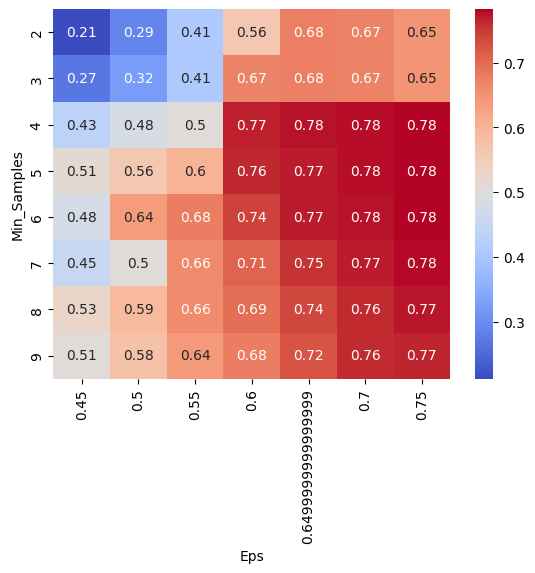

In [15]:
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm')
plt.show()

## Evaluación

In [16]:
model = DBSCAN(eps=0.75, min_samples=4)
y_preds = model.fit_predict(X)
df_blobs['cluster'] = y_preds

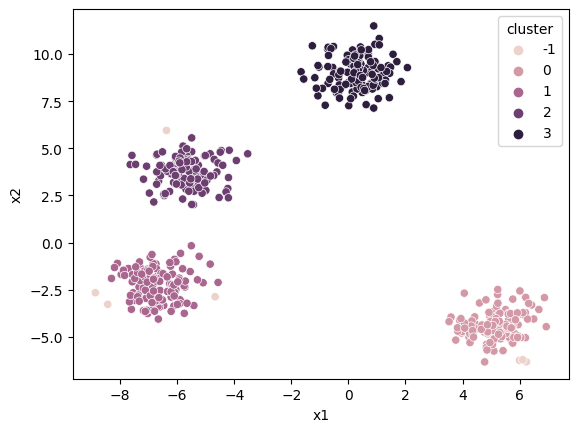

In [17]:
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.show()